In [1]:
import pandas as pd
df=pd.read_csv('/content/twospirals (1).csv')

In [2]:
df.head()

,X,Y,class
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


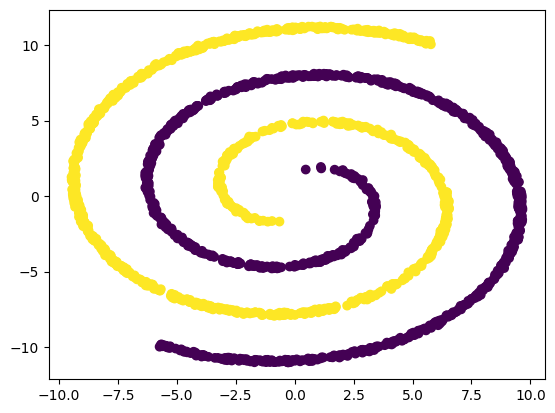

In [3]:
from matplotlib import pyplot as plt
plt.scatter(df['X'],df['Y'],c=df['class'])

In [4]:
X=df[['X','Y']]
y=df['class']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[ 1.68395397, -0.42433384],
       [ 0.59699619, -1.60150038],
       [ 0.2337274 , -0.67638472],
       [ 1.7042551 , -0.37006414],
       [-0.63978854,  0.96496967]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [7]:
print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

X_train.shape :  (1599, 2)
X_test.shape :  (400, 2)
y_train.shape :  (1599,)
y_test.shape :  (400,)


In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Model_relu

In [9]:
model_relu_1 =  Sequential()


model_relu_1.add(Dense(16,activation='relu',input_dim=2))
model_relu_1.add(Dense(32,activation='relu'))
model_relu_1.add(Dense(1,activation='sigmoid'))

model_relu_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_relu_1.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history=model_relu_1.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6214 - loss: 0.6414 - val_accuracy: 0.6475 - val_loss: 0.6330
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - loss: 0.6103 - val_accuracy: 0.6550 - val_loss: 0.6322
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.6053 - val_accuracy: 0.6625 - val_loss: 0.6275
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - loss: 0.5938 - val_accuracy: 0.6600 - val_loss: 0.6228
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.5997 - val_accuracy: 0.6525 - val_loss: 0.6221
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - loss: 0.5925 - val_accuracy: 0.6625 - val_loss: 0.6185
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - loss: 0.5950 - val_accuracy: 0.6525 - val_loss: 0.6185
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.5997 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


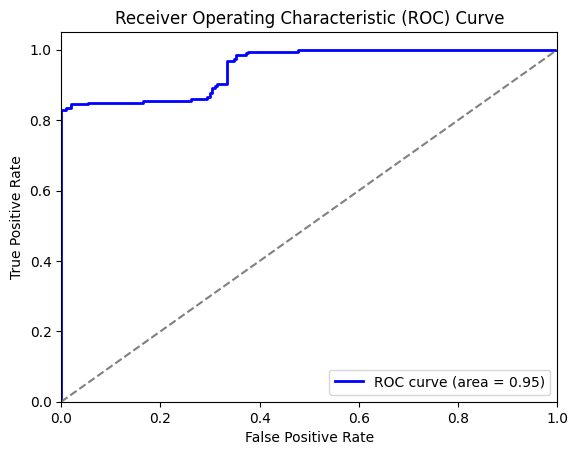

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_relu_1.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

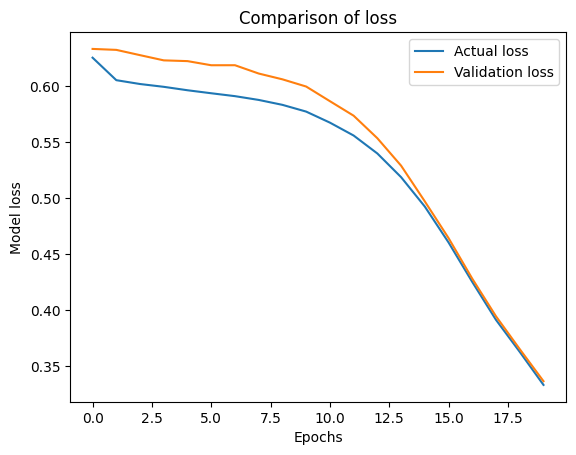

In [14]:
plt.plot(history.history['loss'], label='Actual loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

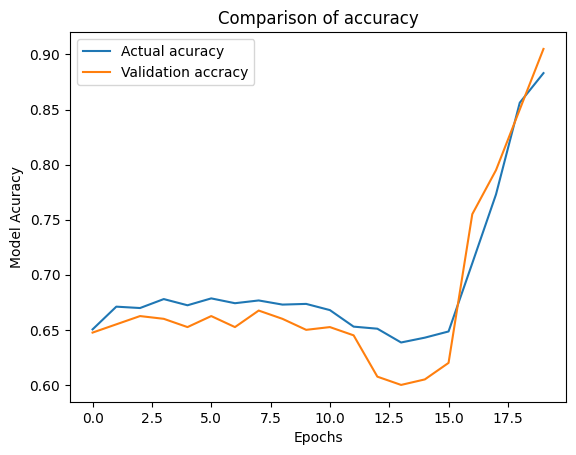

In [15]:
plt.plot(history.history['accuracy'], label='Actual acuracy')
plt.plot(history.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()

In [16]:
# Evaluate the model on test data
loss, accuracy = model_relu_1.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9010 - loss: 0.3494
Test Loss: 0.3363
Test Accuracy: 0.9050


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model_leaky_relu = Sequential()

model_leaky_relu.add(Dense(16, input_dim=2))
model_leaky_relu.add(LeakyReLU(alpha=0.01))  # Adding Leaky ReLU activation

model_leaky_relu.add(Dense(32))
model_leaky_relu.add(LeakyReLU(alpha=0.01))  # Adding Leaky ReLU activation

model_leaky_relu.add(Dense(1, activation='sigmoid'))

model_leaky_relu.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)


In the LeakyReLU activation function, the alpha parameter controls the slope of the function for negative input values. Specifically, it determines how much the Leaky ReLU function "leaks" by allowing a small, non-zero gradient when the input is negative.


Understanding alpha:

Default Value: The default value for alpha is typically 0.3, but in many implementations, it defaults to 0.01.

Functionality:
* When alpha=0, Leaky ReLU behaves like a standard ReLU, where all negative values are set to 0.

* As alpha increases, the negative slope also increases, meaning that the function will allow more of the negative input values to pass through.

* For example, if alpha=0.01, then for negative inputs, the output is 0.01 * x instead of 0 (as in ReLU).

Setting alpha:

Choosing alpha:

* Small values (e.g., 0.01) are typically chosen because they provide a small non-zero gradient for negative inputs, which helps to avoid dead neurons (neurons that never activate).

* Larger values can be used if you want more leakage, allowing the model to retain more information from negative inputs.

* You can experiment with different alpha values to see what works best for your specific problem.

In [18]:
model_leaky_relu.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history1=model_leaky_relu.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5670 - loss: 0.6642 - val_accuracy: 0.6575 - val_loss: 0.6325
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.6071 - val_accuracy: 0.6450 - val_loss: 0.6282
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.5979 - val_accuracy: 0.6575 - val_loss: 0.6256
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6030 - val_accuracy: 0.6475 - val_loss: 0.6231
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.5887 - val_accuracy: 0.6600 - val_loss: 0.6195
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.6054 - val_accuracy: 0.6575 - val_loss: 0.6158
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.5941 - val_accuracy: 0.6575 - val_loss: 0.6114
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6741 - loss: 0.5826 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


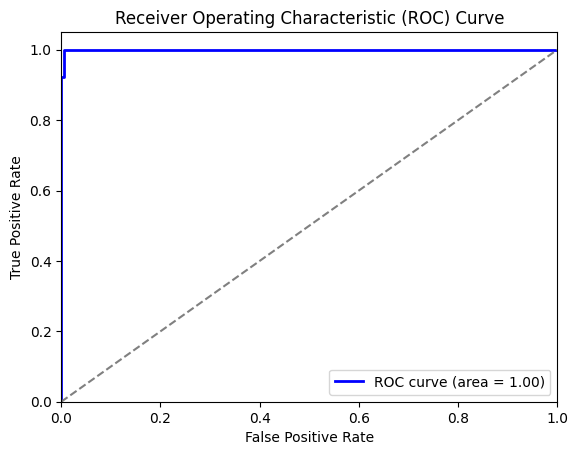

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_leaky_relu.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This ROC curve indicates that your model has reasonably good performance in distinguishing between the positive and negative classes.


Key Observations:

True Positive Rate (TPR): The curve shows a high TPR (close to 1) as you move towards the top-left corner, which indicates that the model correctly identifies most of the positive instances.

False Positive Rate (FPR):
 There is some increase in the FPR as the TPR increases, which is expected. The curve doesn't follow the diagonal line, which would indicate random guessing, so the model is performing better than random.

AUC Score:

AUC = 0.87: The area under the curve (AUC) is 0.83, which is a good score. This means that the model has an 83% chance of correctly distinguishing between a randomly chosen positive instance and a randomly chosen negative instance.

Interpretation:

AUC values generally range from 0.5 to 1.0:
0.5: The model has no discrimination ability (random guessing).

1.0: Perfect discrimination between classes.

0.87: Indicates that the model is quite effective, but not perfect. It's correctly identifying a significant portion of the positive instances while keeping the false positives relatively low.

Summary:

This ROC curve suggests that your model is performing well, with a good balance between sensitivity (true positive rate) and specificity (false positive rate). An AUC of 0.87 indicates that the model is generally reliable in its predictions. However, depending on your specific application, further tuning or improvements might be considered to enhance performance.

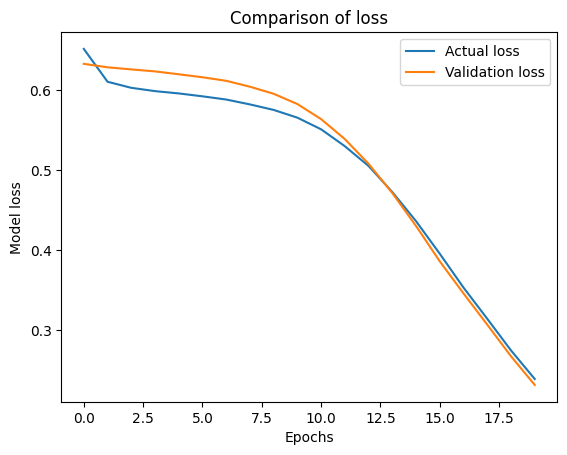

In [20]:
plt.plot(history1.history['loss'], label='Actual loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

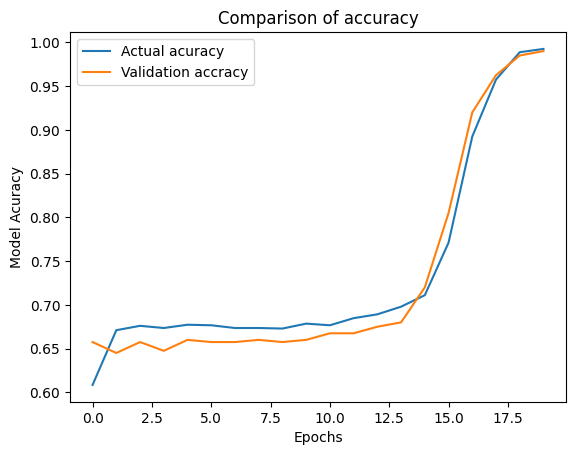

In [21]:
plt.plot(history1.history['accuracy'], label='Actual acuracy')
plt.plot(history1.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()

In [22]:
# Evaluate the model on test data
loss, accuracy = model_leaky_relu.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9879 - loss: 0.2367
Test Loss: 0.2316
Test Accuracy: 0.9900


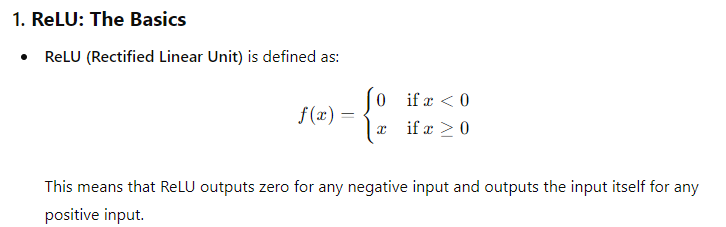

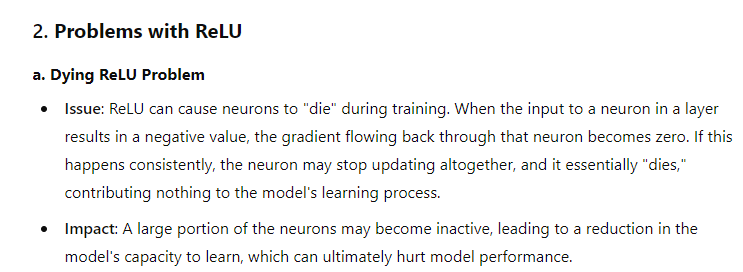

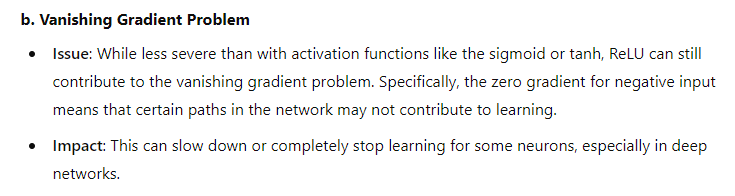

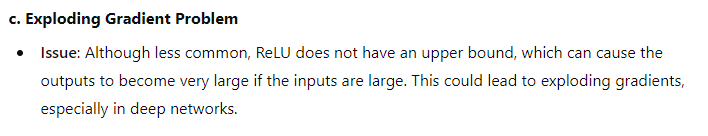

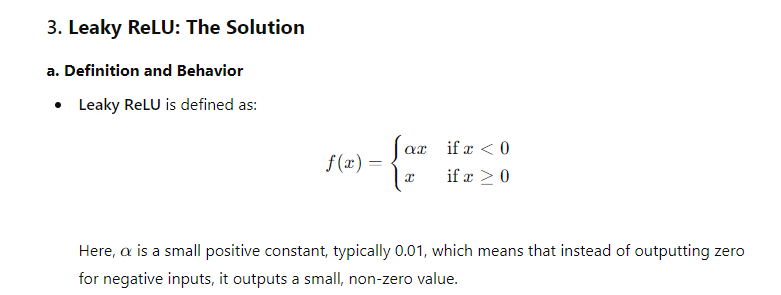

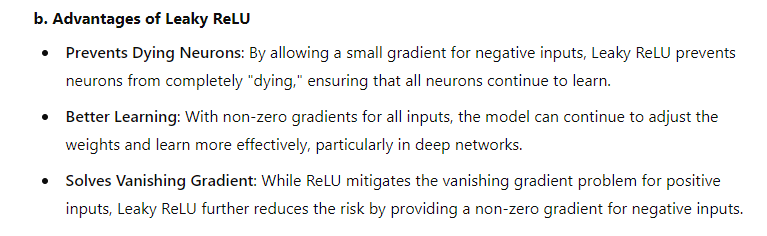

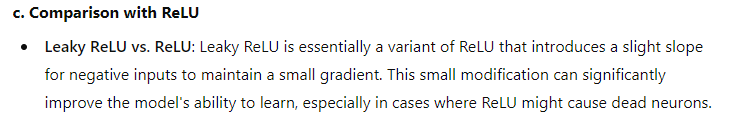

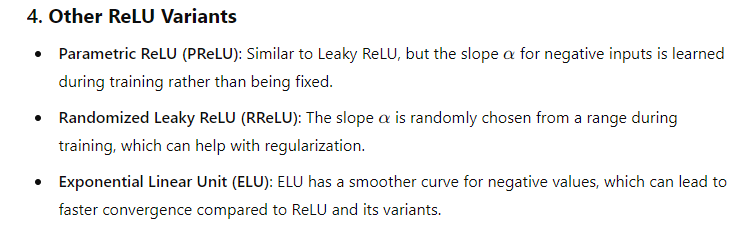